In [6]:
import sys
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stat

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Files and Paths
files_ = {
    "historical_transactions": "data/historical_transactions.csv",
    "merchants": "data/merchants.csv",
    "new_merchant_transactions": "data/new_merchant_transactions.csv",
    "train": "data/train.csv",
    "test": "data/test.csv"
}
output_dir = "output/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [3]:
# Read in tables as provided
df_hist_trans = pd.read_csv(files_.get("historical_transactions"), nrows=10000)
df_merchants = pd.read_csv(files_.get("merchants"), nrows=10000)
df_new_merch_trans = pd.read_csv(files_.get("new_merchant_transactions"), nrows=10000)
df_train = pd.read_csv(files_.get("train"), nrows=10000)
df_test = pd.read_csv(files_.get("test"), nrows=10000)

In [15]:
assert set(list(df_hist_trans.columns)) == set(list(df_new_merch_trans.columns))

In [4]:
# Historical Transactions
df_hist_trans.sort_values(
    by=['card_id', 'month_lag'], 
    ascending=True,
    inplace=True
)
df_hist_trans.head(200)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
2326,Y,C_ID_058b254a5b,19,N,1,B,278,M_ID_d855771cd9,-8,-0.695066,2017-06-22 21:07:56,1.0,9,37
2344,Y,C_ID_058b254a5b,233,N,1,B,705,M_ID_14275fe7b9,-8,-0.711911,2017-06-15 16:50:42,1.0,9,33
2358,Y,C_ID_058b254a5b,19,N,1,B,683,M_ID_da9f3c65a9,-8,-0.713098,2017-06-21 03:18:40,1.0,9,34
2360,Y,C_ID_058b254a5b,233,N,1,B,278,M_ID_7d09575605,-8,-0.633307,2017-06-15 15:11:19,1.0,9,37
2375,Y,C_ID_058b254a5b,233,N,1,B,307,M_ID_2e161f366a,-8,-0.728876,2017-06-28 22:57:43,1.0,9,19
2378,Y,C_ID_058b254a5b,233,N,1,B,278,M_ID_b7dae49b8c,-8,0.139656,2017-06-24 03:15:14,1.0,9,37
2394,Y,C_ID_058b254a5b,233,N,1,B,454,M_ID_a3aa3d0b44,-8,-0.722865,2017-06-23 22:17:23,1.0,9,39
2407,Y,C_ID_058b254a5b,19,N,1,B,705,M_ID_f322b8fcf1,-8,-0.716028,2017-06-20 19:58:24,1.0,9,33
2408,Y,C_ID_058b254a5b,19,N,1,B,705,M_ID_ca92d0f7ad,-8,-0.618852,2017-06-21 17:17:01,1.0,9,33
2455,Y,C_ID_058b254a5b,233,N,1,B,80,M_ID_d2ce572e42,-8,-0.733384,2017-06-29 00:27:56,1.0,9,37


In [51]:
# Historical Transactions
df_new_merch_trans.sort_values(
    by=['card_id', 'month_lag'], 
    ascending=True,
    inplace=True
)
df_new_merch_trans.head(200)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
2839,Y,C_ID_006005dd0a,20,N,0,A,367,M_ID_fbfa0dc931,1,-0.709342,2018-03-29 11:10:28,3.0,19,16
2840,Y,C_ID_006005dd0a,20,N,0,A,497,M_ID_f162748793,2,-0.701979,2018-04-12 09:48:47,3.0,19,27
2841,Y,C_ID_006005dd0a,20,N,0,A,690,M_ID_4807298a41,2,-0.503478,2018-04-18 09:33:38,3.0,19,1
2842,Y,C_ID_006005dd0a,20,N,0,A,771,M_ID_720bad947c,2,-0.308885,2018-04-27 10:41:32,3.0,19,31
9505,Y,C_ID_008b129f22,69,N,1,B,307,M_ID_525ac5964d,1,-0.701828,2018-03-14 16:39:53,1.0,9,19
9510,Y,C_ID_008b129f22,69,N,1,B,80,M_ID_5ba019a379,1,-0.719109,2018-03-17 22:10:34,1.0,9,37
9503,Y,C_ID_008b129f22,69,N,1,B,307,M_ID_dc214d001d,2,-0.701828,2018-04-16 15:43:11,1.0,9,19
9504,Y,C_ID_008b129f22,69,N,1,B,307,M_ID_e8cb10db0b,2,-0.701828,2018-04-14 15:21:25,1.0,9,19
9506,Y,C_ID_008b129f22,69,N,1,B,544,M_ID_e1220dfe76,2,-0.635712,2018-04-06 08:51:17,1.0,9,29
9507,Y,C_ID_008b129f22,69,N,1,B,307,M_ID_8fa6c6fd89,2,-0.701828,2018-04-06 08:09:37,1.0,9,19


# Categories

Text(0.5,0.98,'Counts of categiories for features')

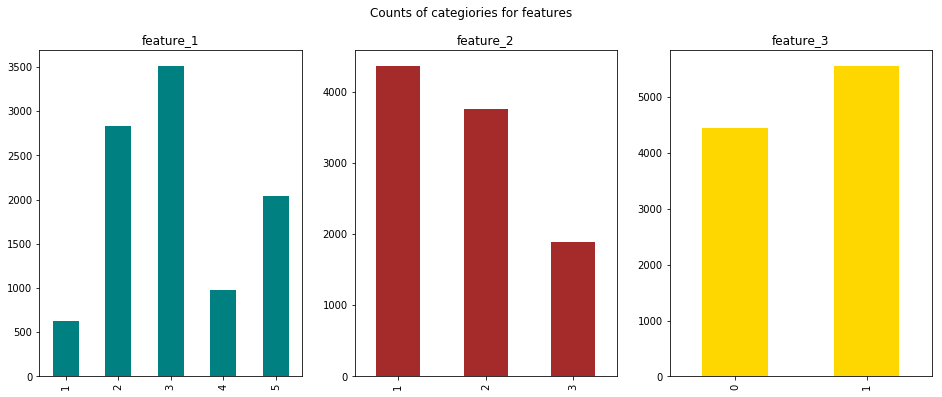

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
df_train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='blue', title='feature_1');
df_train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='blue', title='feature_2');
df_train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='blue', title='feature_3');
plt.suptitle('Counts of categiories for features')

In [28]:
# ---- ---- ----      ---- ---- ----      ---- ---- ----      ---- ---- ----      
# ---- ---- ---- Mean Target Values by Values of Features 1 - 3
# Train
ft1 = df_train.groupby(
    by=['feature_1'], as_index=False
).agg({'target': [np.mean, np.sum]})
ft1.columns = [x[0] if x[1] == '' else x[1] for x in ft1.columns]
ft2 = df_train.groupby(
    by=['feature_2'], as_index=False
).agg({'target': [np.mean, np.sum]})
ft2.columns = [x[0] if x[1] == '' else x[1] for x in ft2.columns]
ft3 = df_train.groupby(
    by=['feature_3'], as_index=False
).agg({'target': [np.mean, np.sum]})
ft3.columns = [x[0] if x[1] == '' else x[1] for x in ft3.columns]
# ---- ---- ----
print(ft1)
print(ft2)
print(ft3)

   feature_1      mean          sum
0          1 -0.238904  -150.031501
1          2 -0.363196 -1028.933849
2          3 -0.374530 -1316.473175
3          4 -0.368421  -360.684594
4          5 -0.450447  -921.163508
   feature_2      mean          sum
0          1 -0.409946 -1788.184016
1          2 -0.319796 -1200.833929
2          3 -0.418624  -788.268684
   feature_3      mean          sum
0          0 -0.346768 -1539.649944
1          1 -0.402453 -2237.636684


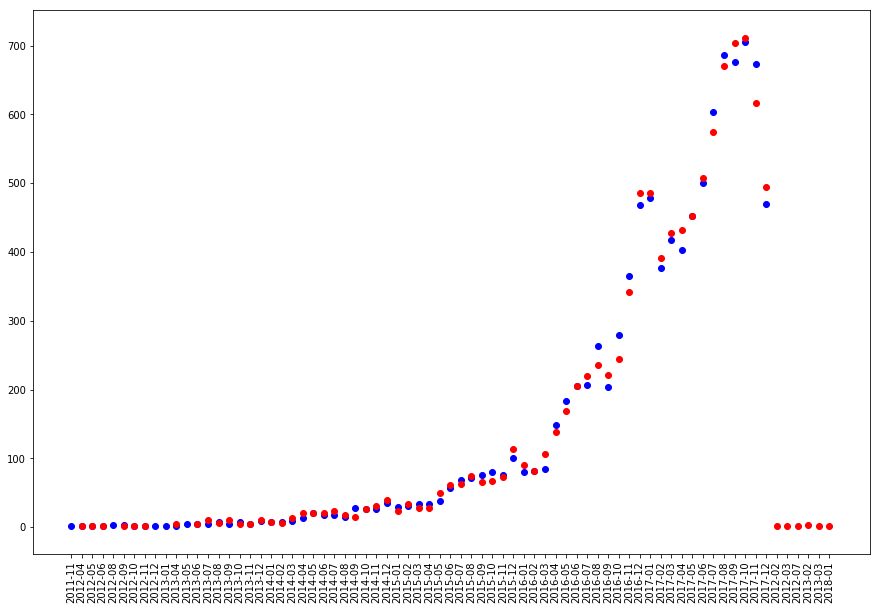

In [37]:
# ---- ---- ----      ---- ---- ----      ---- ---- ----      ---- ---- ----      
# ---- ---- ---- First Active Month - Comp between Train / Test
train_vc = df_train.sort_values(by=['first_active_month'], ascending=True, inplace=False)
train_vc = train_vc.first_active_month.value_counts().sort_index()
test_vc = df_test.sort_values(by=['first_active_month'], ascending=True, inplace=False)
test_vc = test_vc.first_active_month.value_counts().sort_index()

plt.figure(figsize=(15,10))
plt.scatter(train_vc.index, train_vc.values, color='blue')
plt.scatter(test_vc.index, test_vc.values, color='red')
plt.xticks(rotation=90)
plt.show()

# Distribution of purchase_amounts from historical and new transactions

In [ ]:
# Histograms Month Lag and Purchase Amount
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(abs(df_hist_trans['month_lag']), 
                bins=len(set(df_hist_trans.month_lag)))
axes[0, 1].hist(df_hist_trans['purchase_amount'], bins=10)
axes[1, 0].hist(df_new_merch_trans['month_lag'], 
                bins=len(set(df_new_merch_trans.month_lag)))
axes[1, 1].hist(df_new_merch_trans['purchase_amount'], bins=10)
plt.show()

In [11]:
# Historic Trans vs Recent
# KS Test
# (null - drawn from same distribution)
res = stat.ks_2samp(np.array(df_hist_trans.purchase_amount), 
                  np.array(df_new_merch_trans.purchase_amount))
res

Ks_2sampResult(statistic=0.14130000000000004, pvalue=1.9623002077753554e-87)

In [17]:
# category 1 purchase_amount diffs
cat_vals = pd.Series.unique(df_hist_trans['category_1'])
print(cat_vals)
res = stat.ks_2samp(np.array(df_hist_trans.loc[df_hist_trans['category_1'] == 'N', :]['purchase_amount']),
                   np.array(df_hist_trans.loc[df_hist_trans['category_1'] == 'Y', :]['purchase_amount']))
print(res)

['N' 'Y']
Ks_2sampResult(statistic=0.3190604863853669, pvalue=5.192233694660193e-33)


In [39]:
# Decayed Purchase Amount <- 7 8 ->
df = df_hist_trans.month_lag.value_counts().reset_index(inplace=False)
df.columns=['month_lag', 'occurrences']
df.sort_values(by=['month_lag'], inplace=True)
print(df)

    month_lag  occurrences
13        -13          328
11        -12          462
8         -11          547
12        -10          454
10         -9          478
9          -8          508
5          -7          888
2          -6          988
3          -5          919
0          -4         1026
4          -3          889
1          -2         1014
6          -1          804
7           0          695


In [42]:
# Merchant Category Spend Totals
merchant_spend = df_hist_trans.groupby(
    by=['merchant_category_id'], as_index=False
).agg({'purchase_amount': np.sum})
merchant_spend.sort_values(
    by=['purchase_amount'], 
    ascending=False, 
    inplace=True
)
merchant_spend

,merchant_category_id,purchase_amount
125,650,11264.772203
55,332,12.111970
109,550,6.922654
36,215,3.009720
92,491,2.983544
158,836,2.553666
126,656,1.854302
56,333,1.678026
128,665,1.184855
165,891,0.755743


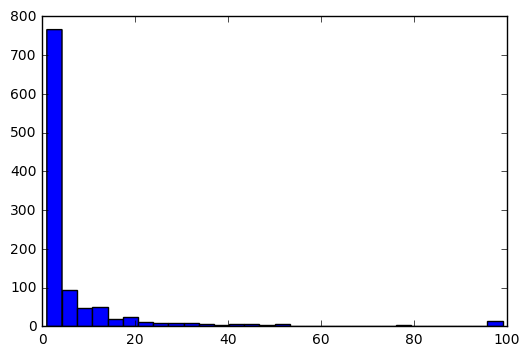

In [46]:
# Count of merchant categories by card_id
card_merchant_cat_count = df_hist_trans.groupby(
    by=['card_id', 'merchant_category_id'], as_index=False
).agg({'purchase_amount': 'count'})
plt.hist(np.clip(card_merchant_cat_count['purchase_amount'], 0, 99), bins=30)
plt.show()

In [73]:
# Clustering
X = df_hist_trans.groupby(
    by=['card_id'],
    as_index=False
).agg({'merchant_id': pd.Series.nunique,
       'purchase_amount': [np.mean, np.sum],
       'month_lag': np.var,
       'installments': np.mean})
X.columns = [
    'card_id', 'avg_installments', 'month_lag_var', 'merchants_unique_count', 
    'mean_purchase_amount', 'total_purchase_amount'
]
print(X.shape)

(37, 6)


4
5
6


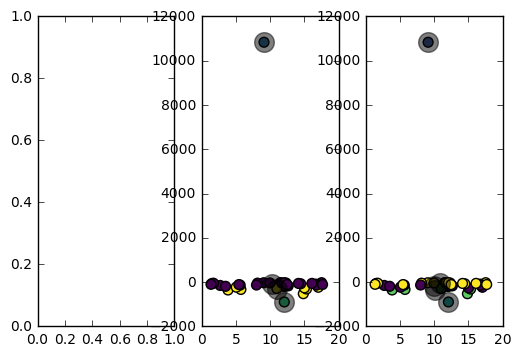

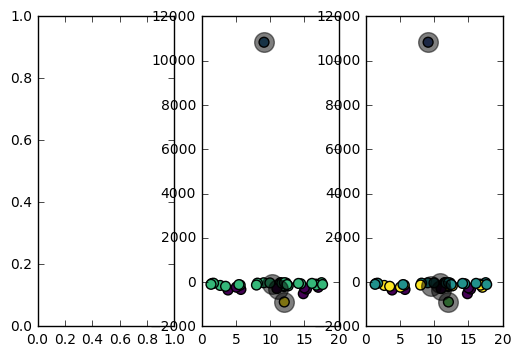

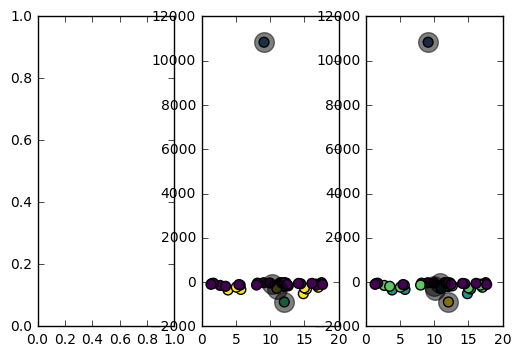

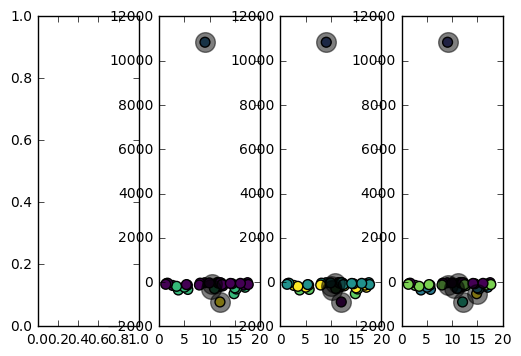

In [125]:
ss = StandardScaler()
fig, axes = plt.subplots(1, 4)
card_id = X.loc[:, ['card_id']]
i = 1
for nclust in np.arange(4, 7, 1):
    print(nclust)
    X_data = X[['month_lag_var', 'total_purchase_amount']]
    ss.fit_transform(X_data)
    model = KMeans(nclust)
    model.fit(X_data)
    clust_labels = model.predict(X_data)
    axes[i].scatter(X_data.iloc[:, 0], X_data.iloc[:, 1], 
                        c=clust_labels, s=50, cmap='viridis')
    centers = model.cluster_centers_
    axes[i].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    i += 1
plt.show()

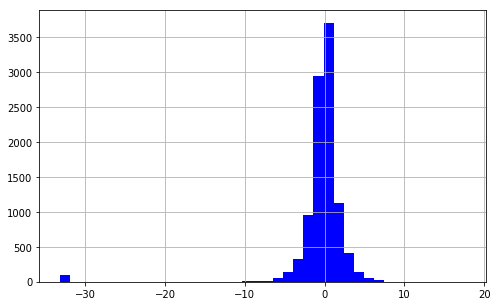

In [40]:
# Target Distribution from Train
plt.figure(figsize=(8, 5))
plt.hist(df_train.target, color='blue', bins=40)
plt.grid()
plt.show()

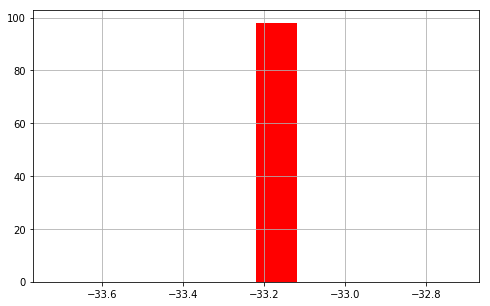

In [41]:
plt.figure(figsize=(8, 5))
plt.hist(df_train.loc[df_train['target'] < -20, :]['target'], color='red')
plt.grid()
plt.show()

In [42]:
df_train.loc[df_train['target'] < -20, :]['target'].value_counts()

-33.219281    98
Name: target, dtype: int64

In [79]:
#
# ---- ---- ----
# Features List

# Mean Purchase Amount
# Unique Merchant category count
# Purchase dollar variance
# Indicators for frequent merchant categories


In [9]:
# Max first active date
import datetime as dt
import os
import pandas as pd
curr_max = dt.datetime(year=1900, month=1, day=1)
for b_ in os.listdir('assembled_bins/'):
    if 'train_' in b_:
        print(b_)
        df = pd.read_csv("assembled_bins/" + b_)
        print(df.columns)
        if df.first_active_month.max() > curr_max:
            curr_max = df.first_active_month.max()
print(curr_max)

train_bin_C_ID_0.csv
Index([u'5', u'2016-09', u'C_ID_0894217f2f', u'4', u'2', u'0', u'0.87158529',
       u'C_ID_0'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'first_active_month'